/opt/anaconda3/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


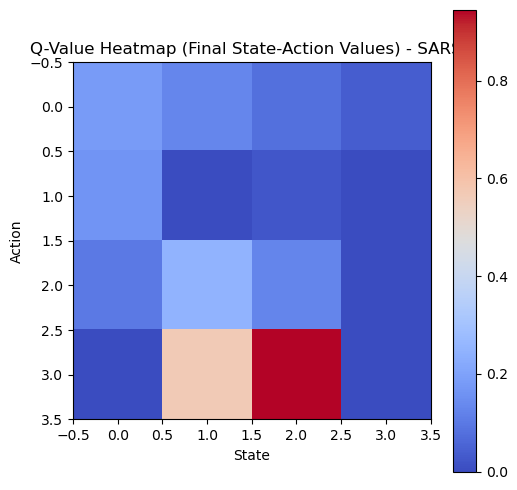


Final Q-table:
 [[1.81836497e-01 9.47359720e-02 3.87268908e-02 5.33173816e-02]
 [1.21274398e-02 1.53752115e-04 4.69134135e-03 1.29833762e-01]
 [1.55989434e-02 8.06295876e-02 1.55330630e-02 9.46303604e-03]
 [1.17794770e-03 1.76900762e-03 6.06465308e-04 4.00982554e-02]
 [1.64180495e-01 3.83212486e-02 5.84281510e-05 2.14534125e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.78197546e-04 9.71373982e-04 2.51961441e-02 1.69559820e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.13277434e-03 1.32354541e-02 4.76498601e-02 1.00044214e-01]
 [6.90126014e-03 2.49213155e-01 1.38968423e-02 2.09334581e-01]
 [1.28690500e-01 7.00986697e-03 8.67812751e-03 8.93981800e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.98626156e-01 1.27133371e-01 5.66903761e-01 7.42374838e-02]
 [2.66206993e-01 9.44613255e-01 2.56829222e-01 3.20342911e-01]
 [0.00000000e+00 0.00000000e+00 0.0000

In [3]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")
alpha = 0.7
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 1000
max_steps = 100

Q = np.zeros((env.observation_space.n, env.action_space.n))
q_values_history = []

for episode in range(episodes):
    state = env.reset()[0]
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    done = False
    for step in range(max_steps):
        next_state, reward, done, _, _ = env.step(action)
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_state])
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )
        state = next_state
        action = next_action
        if done:
            break
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    q_values_history.append(np.copy(Q))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
q_table = np.max(Q, axis=1).reshape((4, 4))
plt.imshow(q_table, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Q-Value Heatmap (Final State-Action Values) - SARSA")
plt.xlabel("State")
plt.ylabel("Action")
plt.tight_layout()
plt.show()

print("\nFinal Q-table:\n", Q)

def record_video(env, Qtable, video_path, fps=2):
    frames = []
    state = env.reset()[0]
    for _ in range(100):
        frames.append(env.render())
        action = np.argmax(Qtable[state])
        state, _, done, _, _ = env.step(action)
        if done:
            frames.append(env.render())
            break
    imageio.mimsave(video_path, frames, fps=fps)

# video_path = "sarsa_replay.gif"
# record_video(env, Q, video_path, fps=2)
# Image(video_path)

In [3]:
pip install gym[toy_text]

zsh:1: no matches found: gym[toy_text]
Note: you may need to restart the kernel to use updated packages.
